In [27]:
import pandas as pd
df=pd.read_csv('credit_scoring_eng.csv')
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [28]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [31]:
df.shape

(21525, 12)

In [30]:
df.isnull().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [33]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['days_employed'] = imputer.fit_transform(df[['days_employed']])


In [34]:
df['total_income'] = imputer.fit_transform(df[['total_income']])

In [35]:
df.isnull().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

## import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['total_income'])
plt.show()

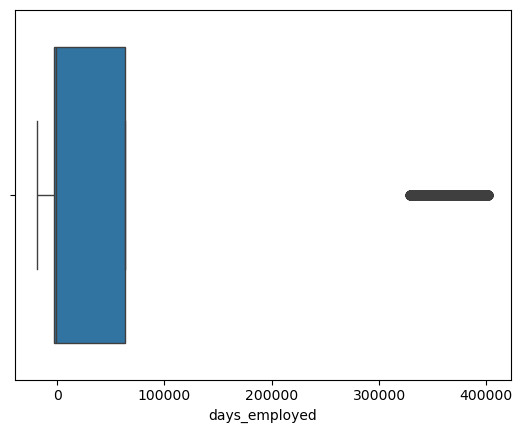

In [40]:
sns.boxplot(x=df['days_employed'])
plt.show()

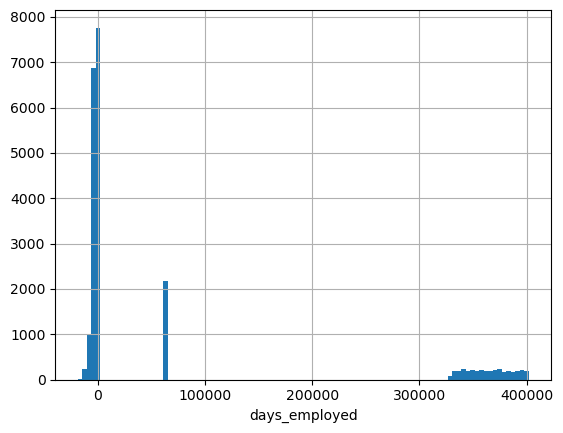

In [58]:
df['days_employed'].hist(bins=100)
plt.xlabel('days_employed')
plt.show()

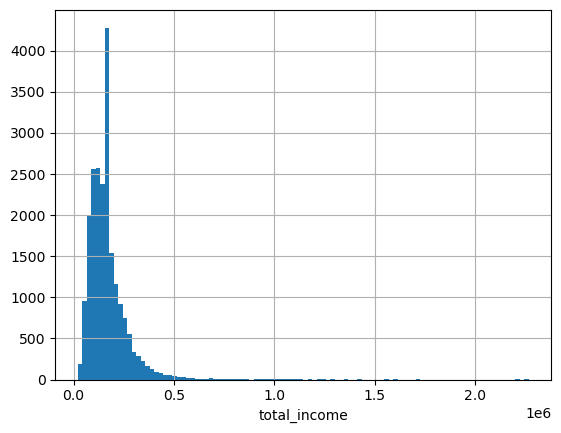

In [59]:
df['total_income'].hist(bins=100)
plt.xlabel('total_income')
plt.show()

In [48]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(df['total_income']))
outliers_z = df[z_scores > 3]
outliers_z
print(outliers_z.shape)

(310, 12)


In [68]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(df['days_employed']))
outliers_z = df[z_scores > 2]
outliers_z.shape


(3380, 12)

In [61]:
Q1 = df['total_income'].quantile(0.25)
Q3 = df['total_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['total_income'] < lower_bound) | 
(df['total_income'] > upper_bound)]
outliers_iqr

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
39,0,-650.587796,31,masters degree,0,civil partnership,1,F,partner,0,754240.797248,to become educated
47,1,-2689.137274,33,masters degree,0,civil partnership,1,M,civil servant,0,356277.909345,having a wedding
58,0,-335.318630,36,masters degree,0,married,0,M,employee,0,414404.202897,property
62,0,-7845.649233,48,Masters Degree,0,unmarried,4,M,civil servant,0,435388.195272,getting higher education
68,2,-2152.475526,46,masters degree,0,married,0,M,partner,0,592071.464571,transactions with the residential real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21430,0,-170.306697,41,secondary education,1,married,0,F,employee,1,350897.953997,purchase of a car
21472,2,-2768.868055,39,masters degree,0,married,0,F,partner,0,362691.432222,cars
21476,0,-2539.502794,52,masters degree,0,married,0,M,partner,0,527452.833253,transactions with my real estate
21481,0,-829.519627,30,bachelor degree,2,civil partnership,1,M,employee,0,440470.880955,to buy a car


In [63]:
Q1 = df['days_employed'].quantile(0.25)
Q3 = df['days_employed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['days_employed'] < lower_bound) | 
(df['days_employed'] > upper_bound)]
outliers_iqr.shape

(3445, 12)

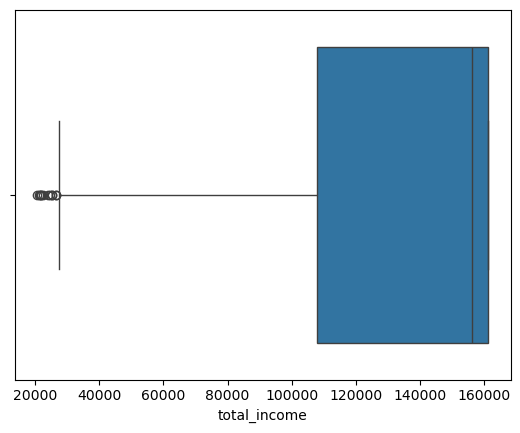

In [76]:
df_capped = df.copy()
df_capped['total_income'] = np.where(df_capped['total_income'] > upper_bound, upper_bound,np.where(df_capped['total_income'] < lower_bound, lower_bound, df_capped['total_income']))
df_capped
sns.boxplot(x=df_capped['total_income'])
plt.show()

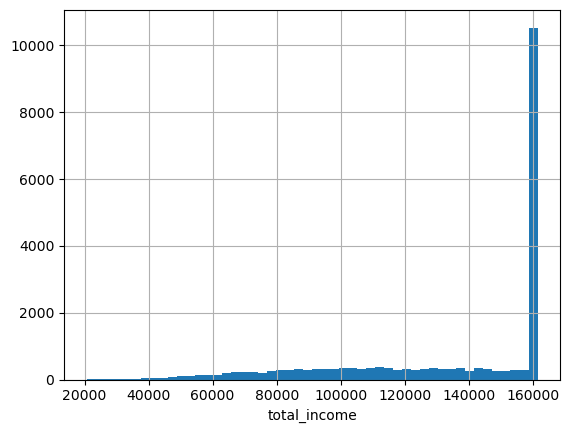

In [78]:
df_capped['total_income'].hist(bins=50)
plt.xlabel('total_income')
plt.show()

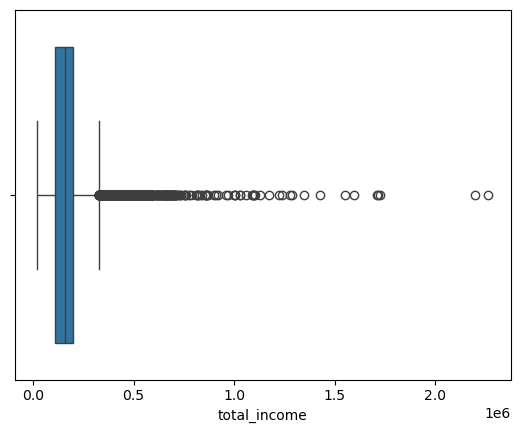

In [80]:
df_capped = df.copy()
Q1 = df_capped['days_employed'].quantile(0.25)
Q3 = df_capped['days_employed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_capped['days_employed'] = np.where(df_capped['days_employed'] > upper_bound, upper_bound,np.where(df_capped['days_employed'] < lower_bound, lower_bound, df_capped['days_employed']))
df_capped
sns.boxplot(x=df_capped['total_income'])
plt.show()

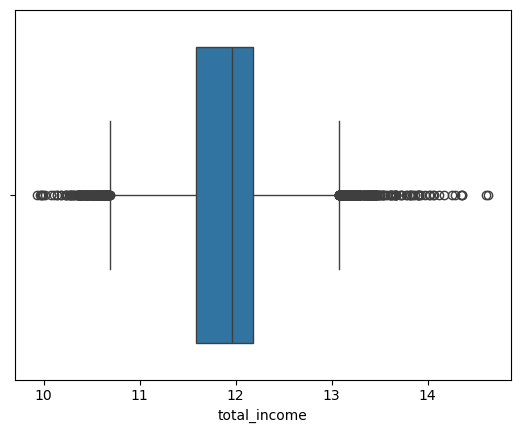

In [81]:
df_log = df.copy()
df_log['total_income'] = np.log(df_log['total_income'] + 1)
sns.boxplot(x=df_log['total_income'])
plt.show()

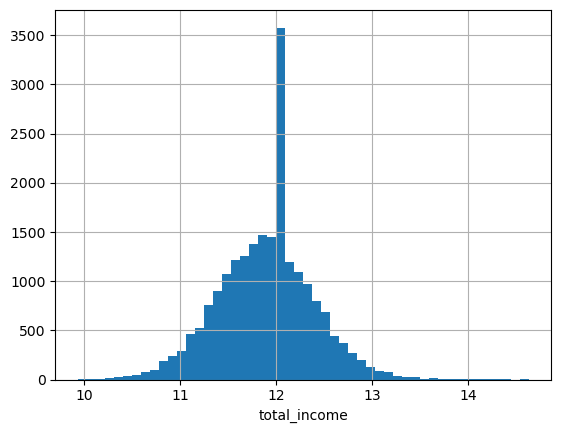

In [82]:
df_log['total_income'].hist(bins=50)
plt.xlabel('total_income')
plt.show()

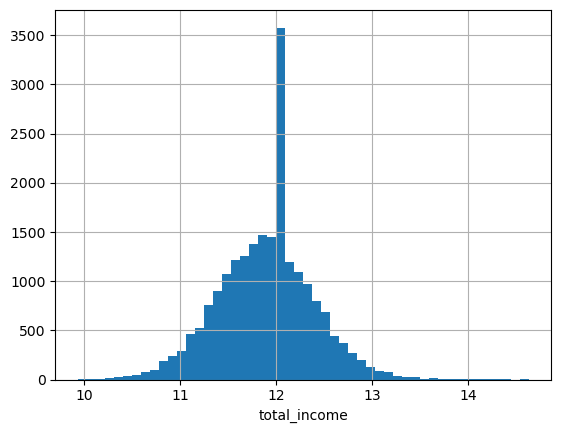

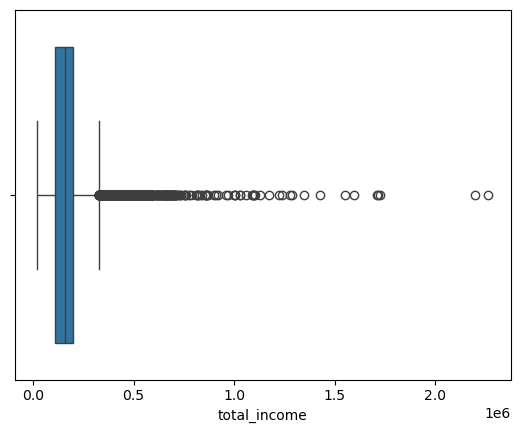

In [85]:
sns.boxplot(x=df['total_income'])
plt.show()

(0, 12)


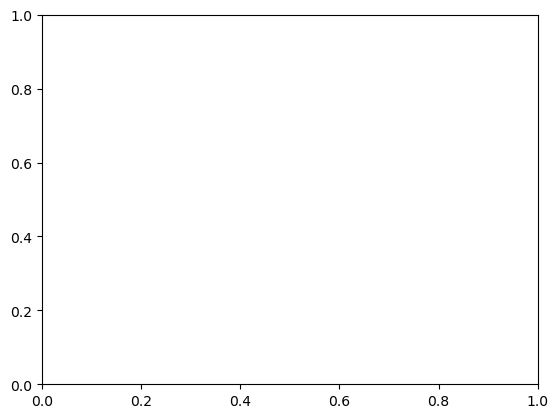

In [99]:
df_removed = df[(df['total_income'] >= 1.25) & (df['total_income'] <= 1.35)]
print(df_removed.shape)
sns.boxplot(x=df_removed['total_income'])
plt.show()